# Production demand patterns
*This notebook illustrates methods to explore the demand patterns of a set of parts.*  
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from logproj.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=2500, num_parts = 100)


In [4]:
#print nodes dataframe
display(HTML(D_mov.head().to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,1,NODE_1,41.785339,14.488970,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:51:45.022824,2020-01-02 00:54:08.176488,16,NODE_16,41.635975,14.323586,2020-01-02 09:34:36.094536,2020-01-02 10:34:36.094536,2020-01-02 09:47:18.040182,2020-01-02 10:29:14.485920,4,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,2.796286,2019-12-30 14:20:17.669312,TEU CONTAINER,USER_5
0,12,NODE_12,41.723341,14.095845,2020-01-02 11:41:55.838152,2020-01-02 12:41:55.838152,2020-01-02 11:51:05.940035,2020-01-02 12:49:23.889718,7,NODE_7,41.784199,14.103357,2020-01-02 14:29:48.886254,2020-01-02 15:29:48.886254,2020-01-02 14:26:18.195719,2020-01-02 15:15:26.094031,57,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,6.112643,2020-01-01 06:50:08.924953,TEU CONTAINER,USER_3
0,13,NODE_13,41.476197,14.831389,2020-01-02 15:35:31.280013,2020-01-02 16:35:31.280013,2020-01-02 15:23:23.283558,2020-01-02 16:14:17.327232,16,NODE_16,41.635975,14.323586,2020-01-03 14:14:37.243472,2020-01-03 15:14:37.243472,2020-01-03 14:12:38.396018,2020-01-03 14:52:11.508007,90,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,3.154983,2019-12-28 21:14:10.824223,FEU CONTAINER,USER_6
0,0,NODE_0,41.422379,13.997876,2020-01-03 16:05:56.216456,2020-01-03 17:05:56.216456,2020-01-03 15:48:20.198165,2020-01-03 17:17:18.440390,6,NODE_6,41.422574,14.594586,2020-01-04 06:47:14.332984,2020-01-04 07:47:14.332984,2020-01-04 06:41:30.887980,2020-01-04 07:53:45.589138,58,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,4.164292,2020-01-02 20:08:05.798343,FEU CONTAINER,USER_4
0,15,NODE_15,41.921939,14.351323,2020-01-04 08:06:23.089498,2020-01-04 09:06:23.089498,2020-01-04 08:09:36.269632,2020-01-04 09:09:16.534553,7,NODE_7,41.784199,14.103357,2020-01-04 20:05:08.332935,2020-01-04 21:05:08.332935,2020-01-04 20:01:32.371906,2020-01-04 20:59:09.652927,81,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,2.551524,2019-12-10 21:39:30.876085,TEU CONTAINER,USER_7


### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, prediction_results_path = creaCartella(root_path,f"P9_predictions")

Cartella TOY_DATA_results già esistente
Cartella P9_predictions già esistente


### Calculate ADI and CV2

In [6]:
from logproj.P1_familyProblem.part_classification import calculateADICV2

#set column parameters
itemfield='ITEMCODE' #column name with itemcode 
qtyfield = 'QUANTITY' #column name with quantity
dateVar = 'TIMESTAMP_IN'

D_demandPatterns = calculateADICV2(D_mov, itemfield, qtyfield, dateVar)
    

In [7]:
#print demand patterns dataframe
display(HTML(D_demandPatterns.head().to_html()))

,ITEMCODE,ADI,CV2
0,0,0.011864,0.324136
0,1,0.015819,0.214354
0,2,0.014689,0.237740
0,3,0.013559,0.159037
0,4,0.013559,0.186433


### Plot demand patterns

In [8]:
#set the relative importance of each part
D_demandPatterns['frequency']=1

(<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 0,
 100,
 0,
 0)

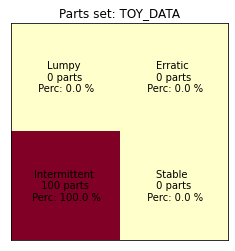

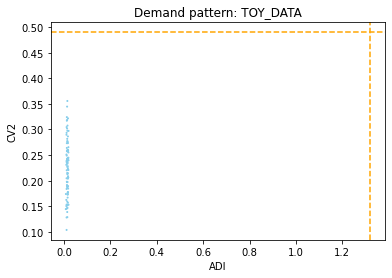

In [9]:
from logproj.P1_familyProblem.part_classification import demandPatternADICV2
demandPatternADICV2(D_demandPatterns, string_casestudy, draw=True)